## Important Libraries

In [54]:
import numpy as np
import pandas as pd
import pickle 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from keras.models import Sequential,load_model
from keras.layers import Dense,BatchNormalization,Input
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

## Read Data and Show it

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Show Data Information and its Description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Cleansing

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.duplicated().sum()

1081

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

## Data Analysis and Visualization

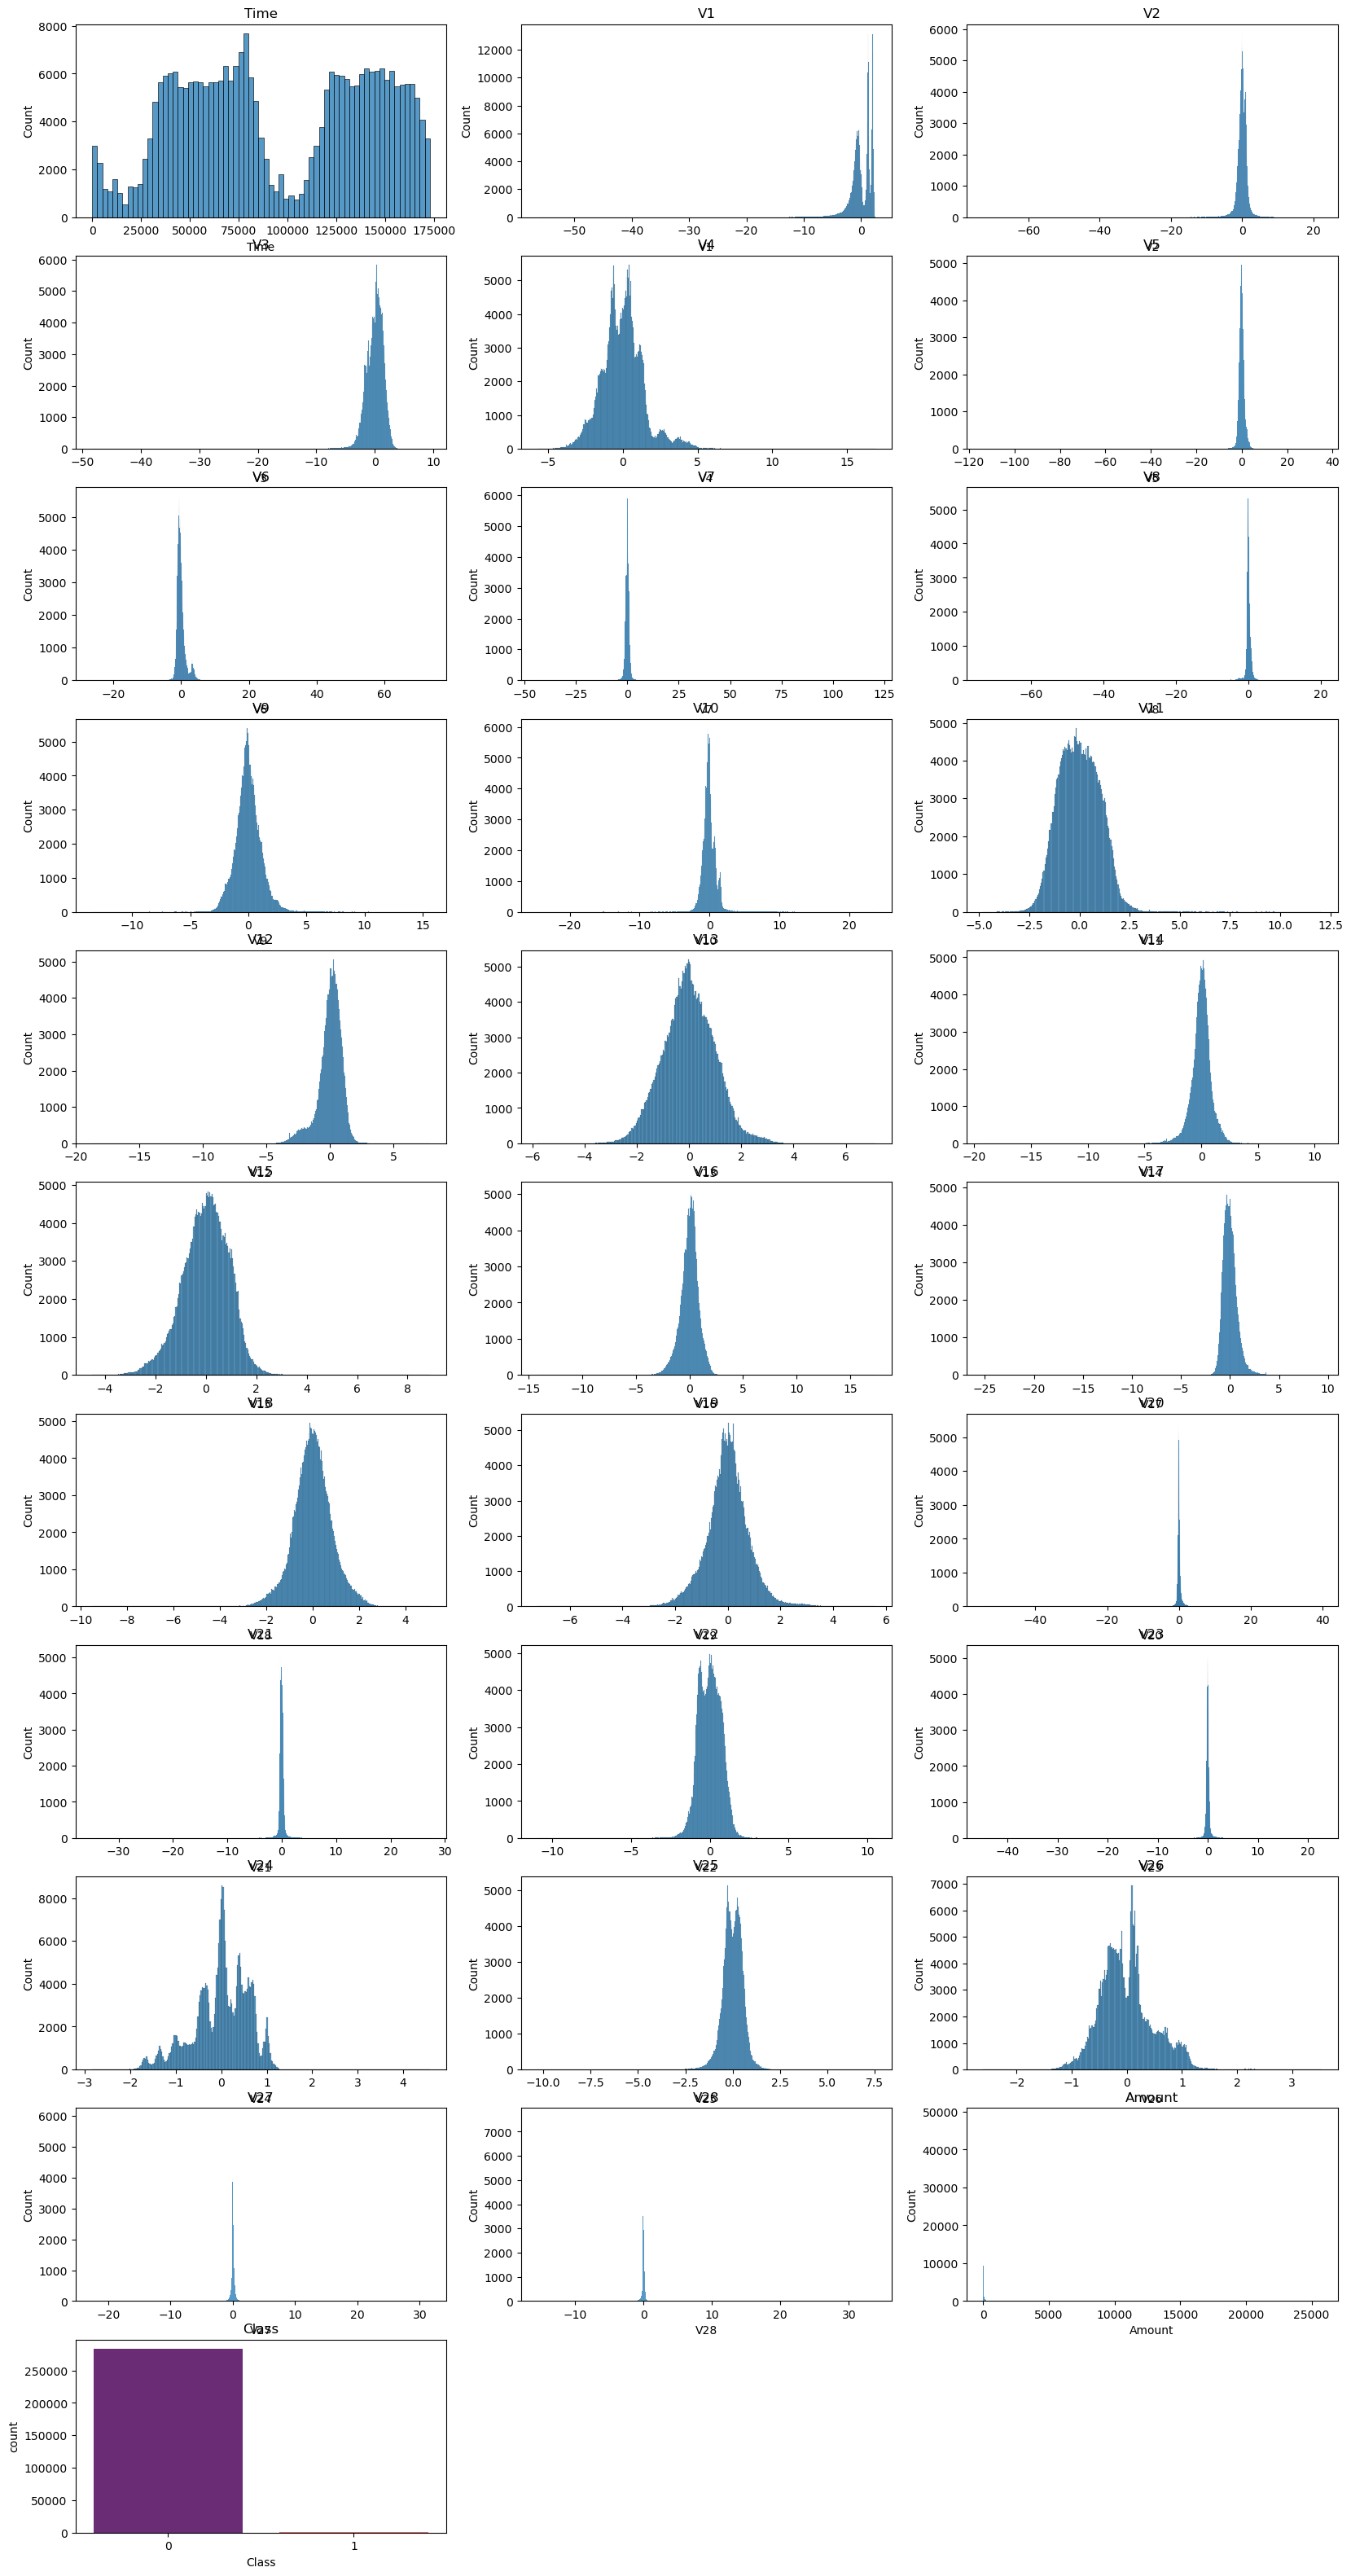

In [14]:
plt.figure(figsize=(20,40))
index_plot=1
for col in data.columns:
    if data[col].nunique()<=10:
        plt.subplot(11,3,index_plot)
        plt.title(col.capitalize())
        sns.countplot(data=data,x=col,palette='magma')
        index_plot+=1
    else:
        plt.subplot(11,3,index_plot)
        plt.title(col.capitalize())
        sns.histplot(data=data,x=col,palette='coolwarm')
        index_plot+=1
plt.show()        
            

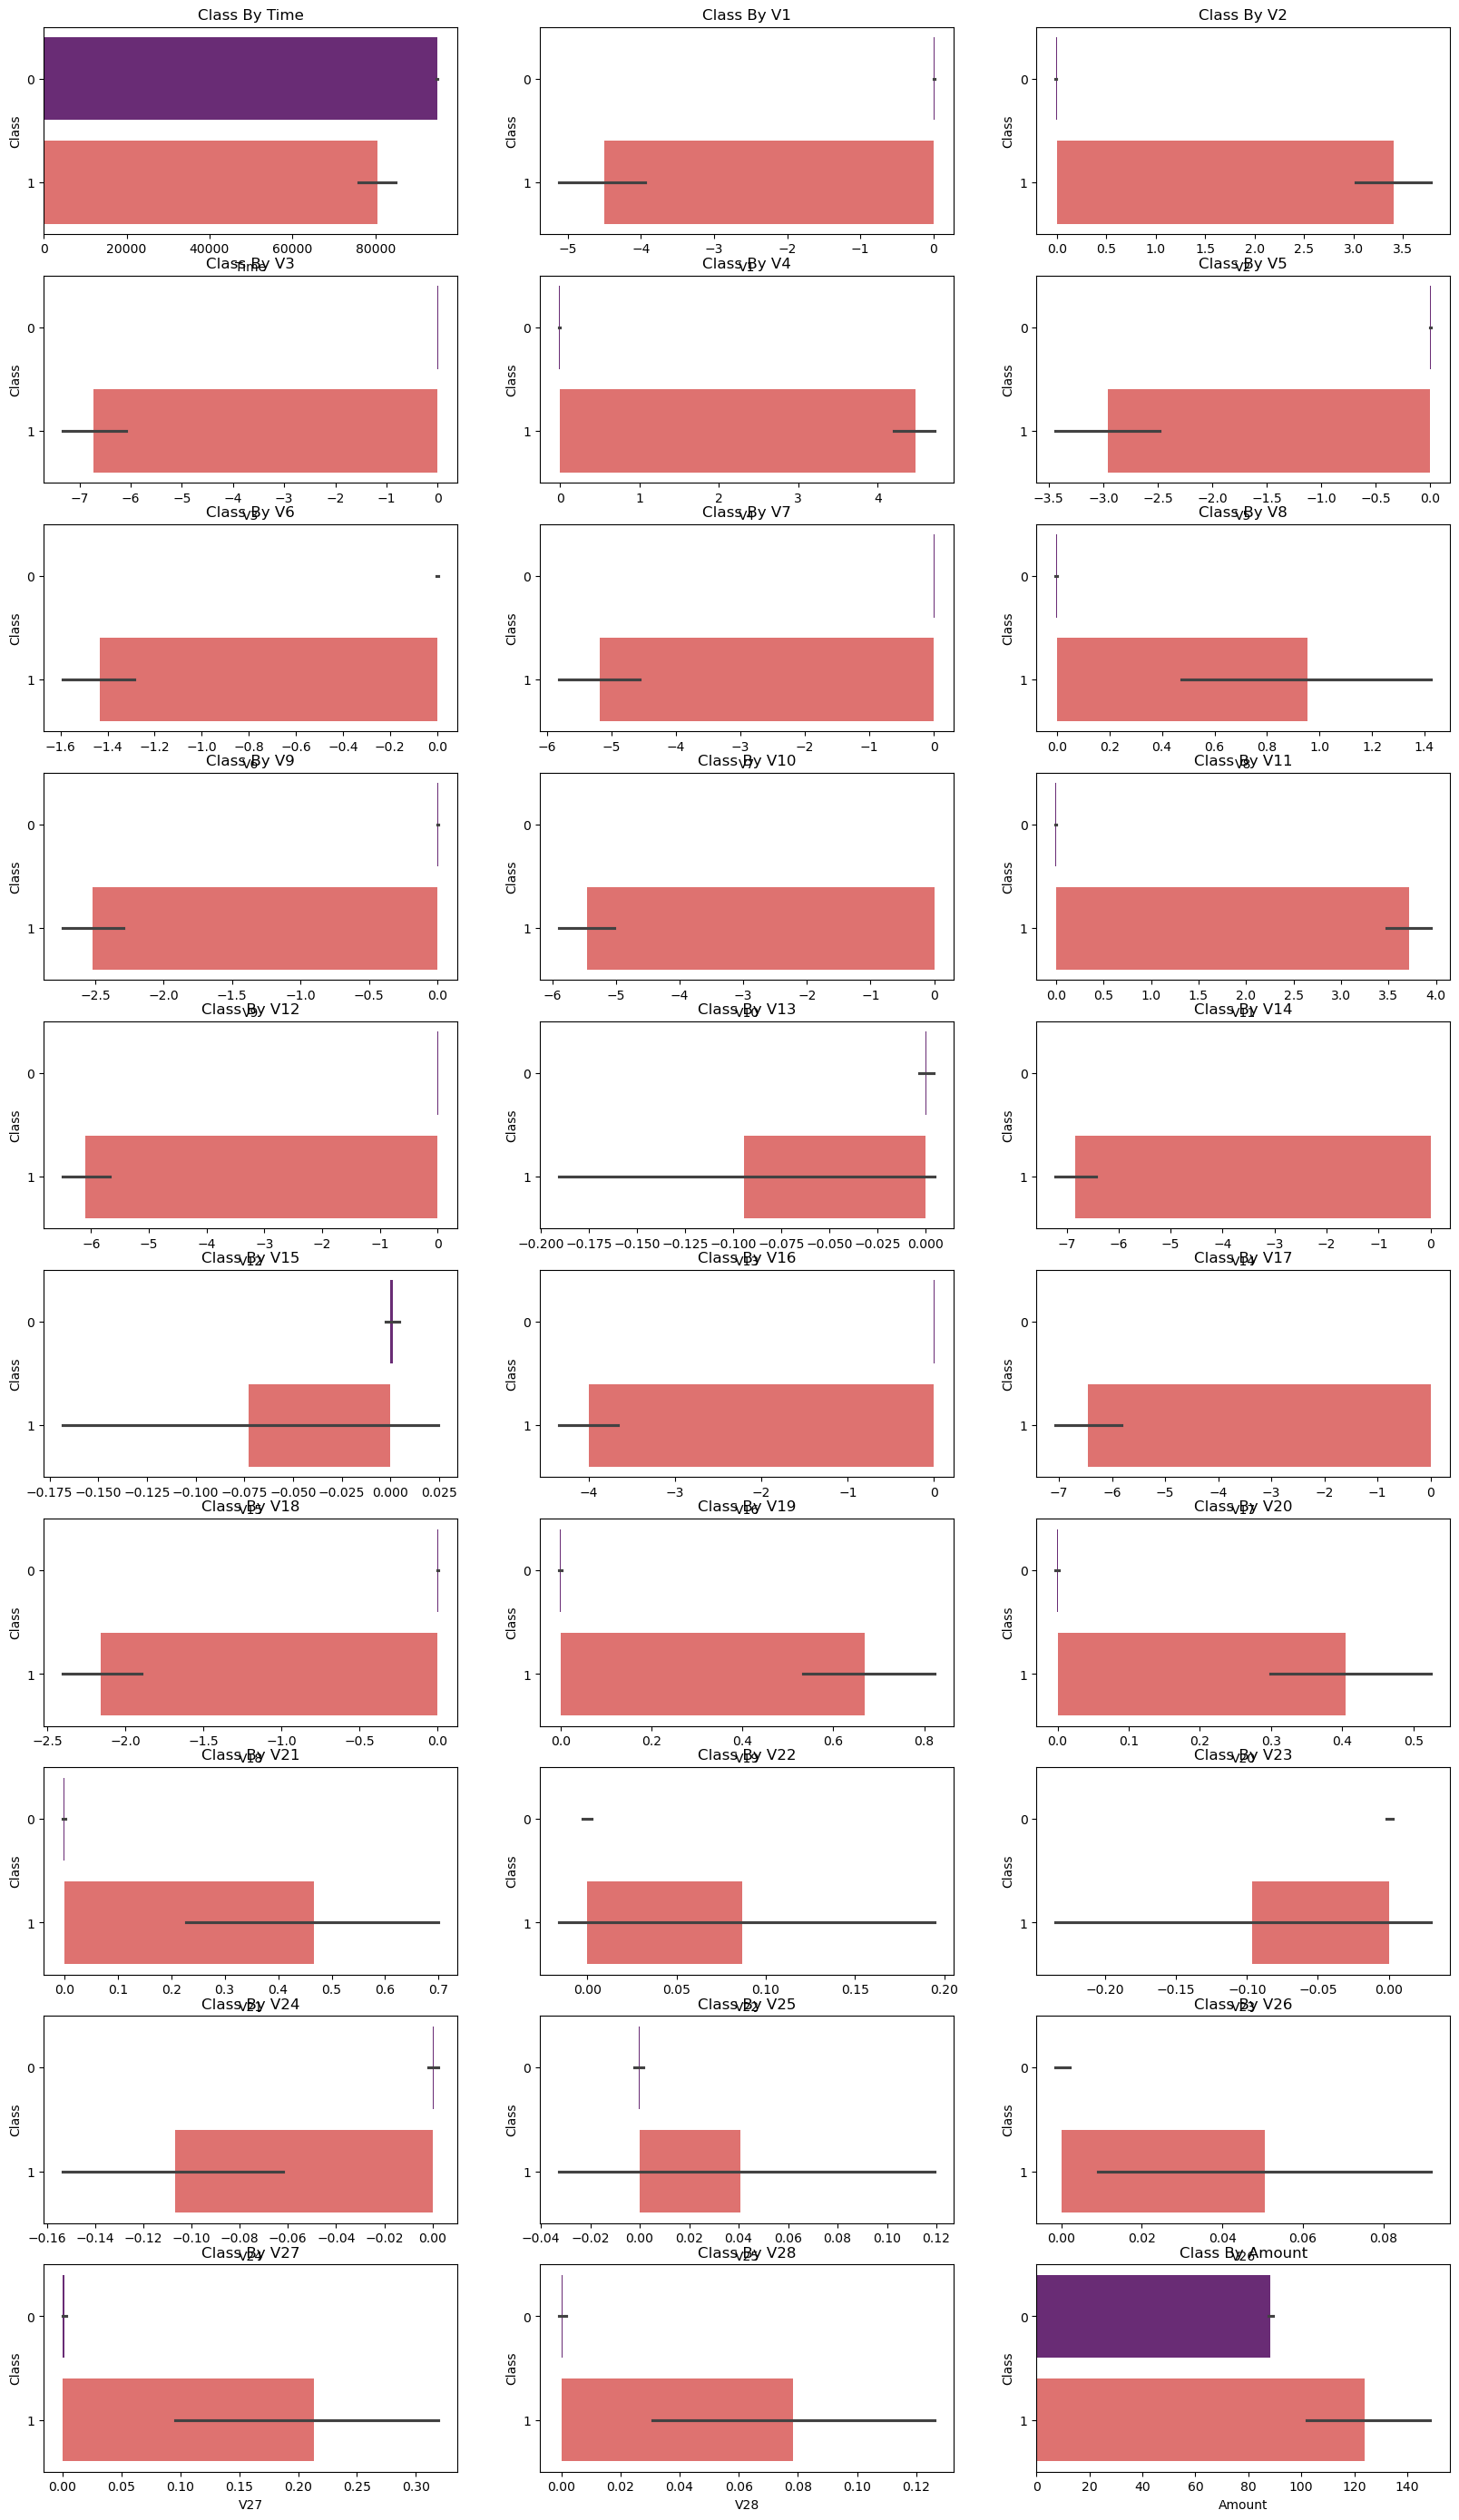

In [15]:
plt.figure(figsize=(20,35))
index_plot=1
for col in data.columns[:-1]:
    if data[col].nunique()<=10:
        plt.subplot(10,3,index_plot)
        plt.title("Class By "+col.capitalize())
        sns.barplot(data=data,x=data[col].value_counts(),y='Class',orient='h',palette='magma')
        index_plot+=1
    else:
        plt.subplot(10,3,index_plot)
        plt.title("Class By "+col.capitalize())
        sns.barplot(data=data,x=col,y='Class',orient='h',palette='magma')
        index_plot+=1
plt.show()        
            

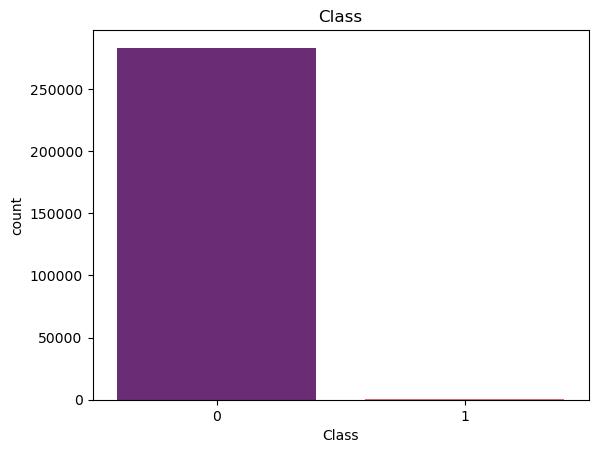

In [10]:
plt.title("Class")
sns.countplot(data=data,x='Class',palette='magma')
plt.show()

## Data Preprocessing

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

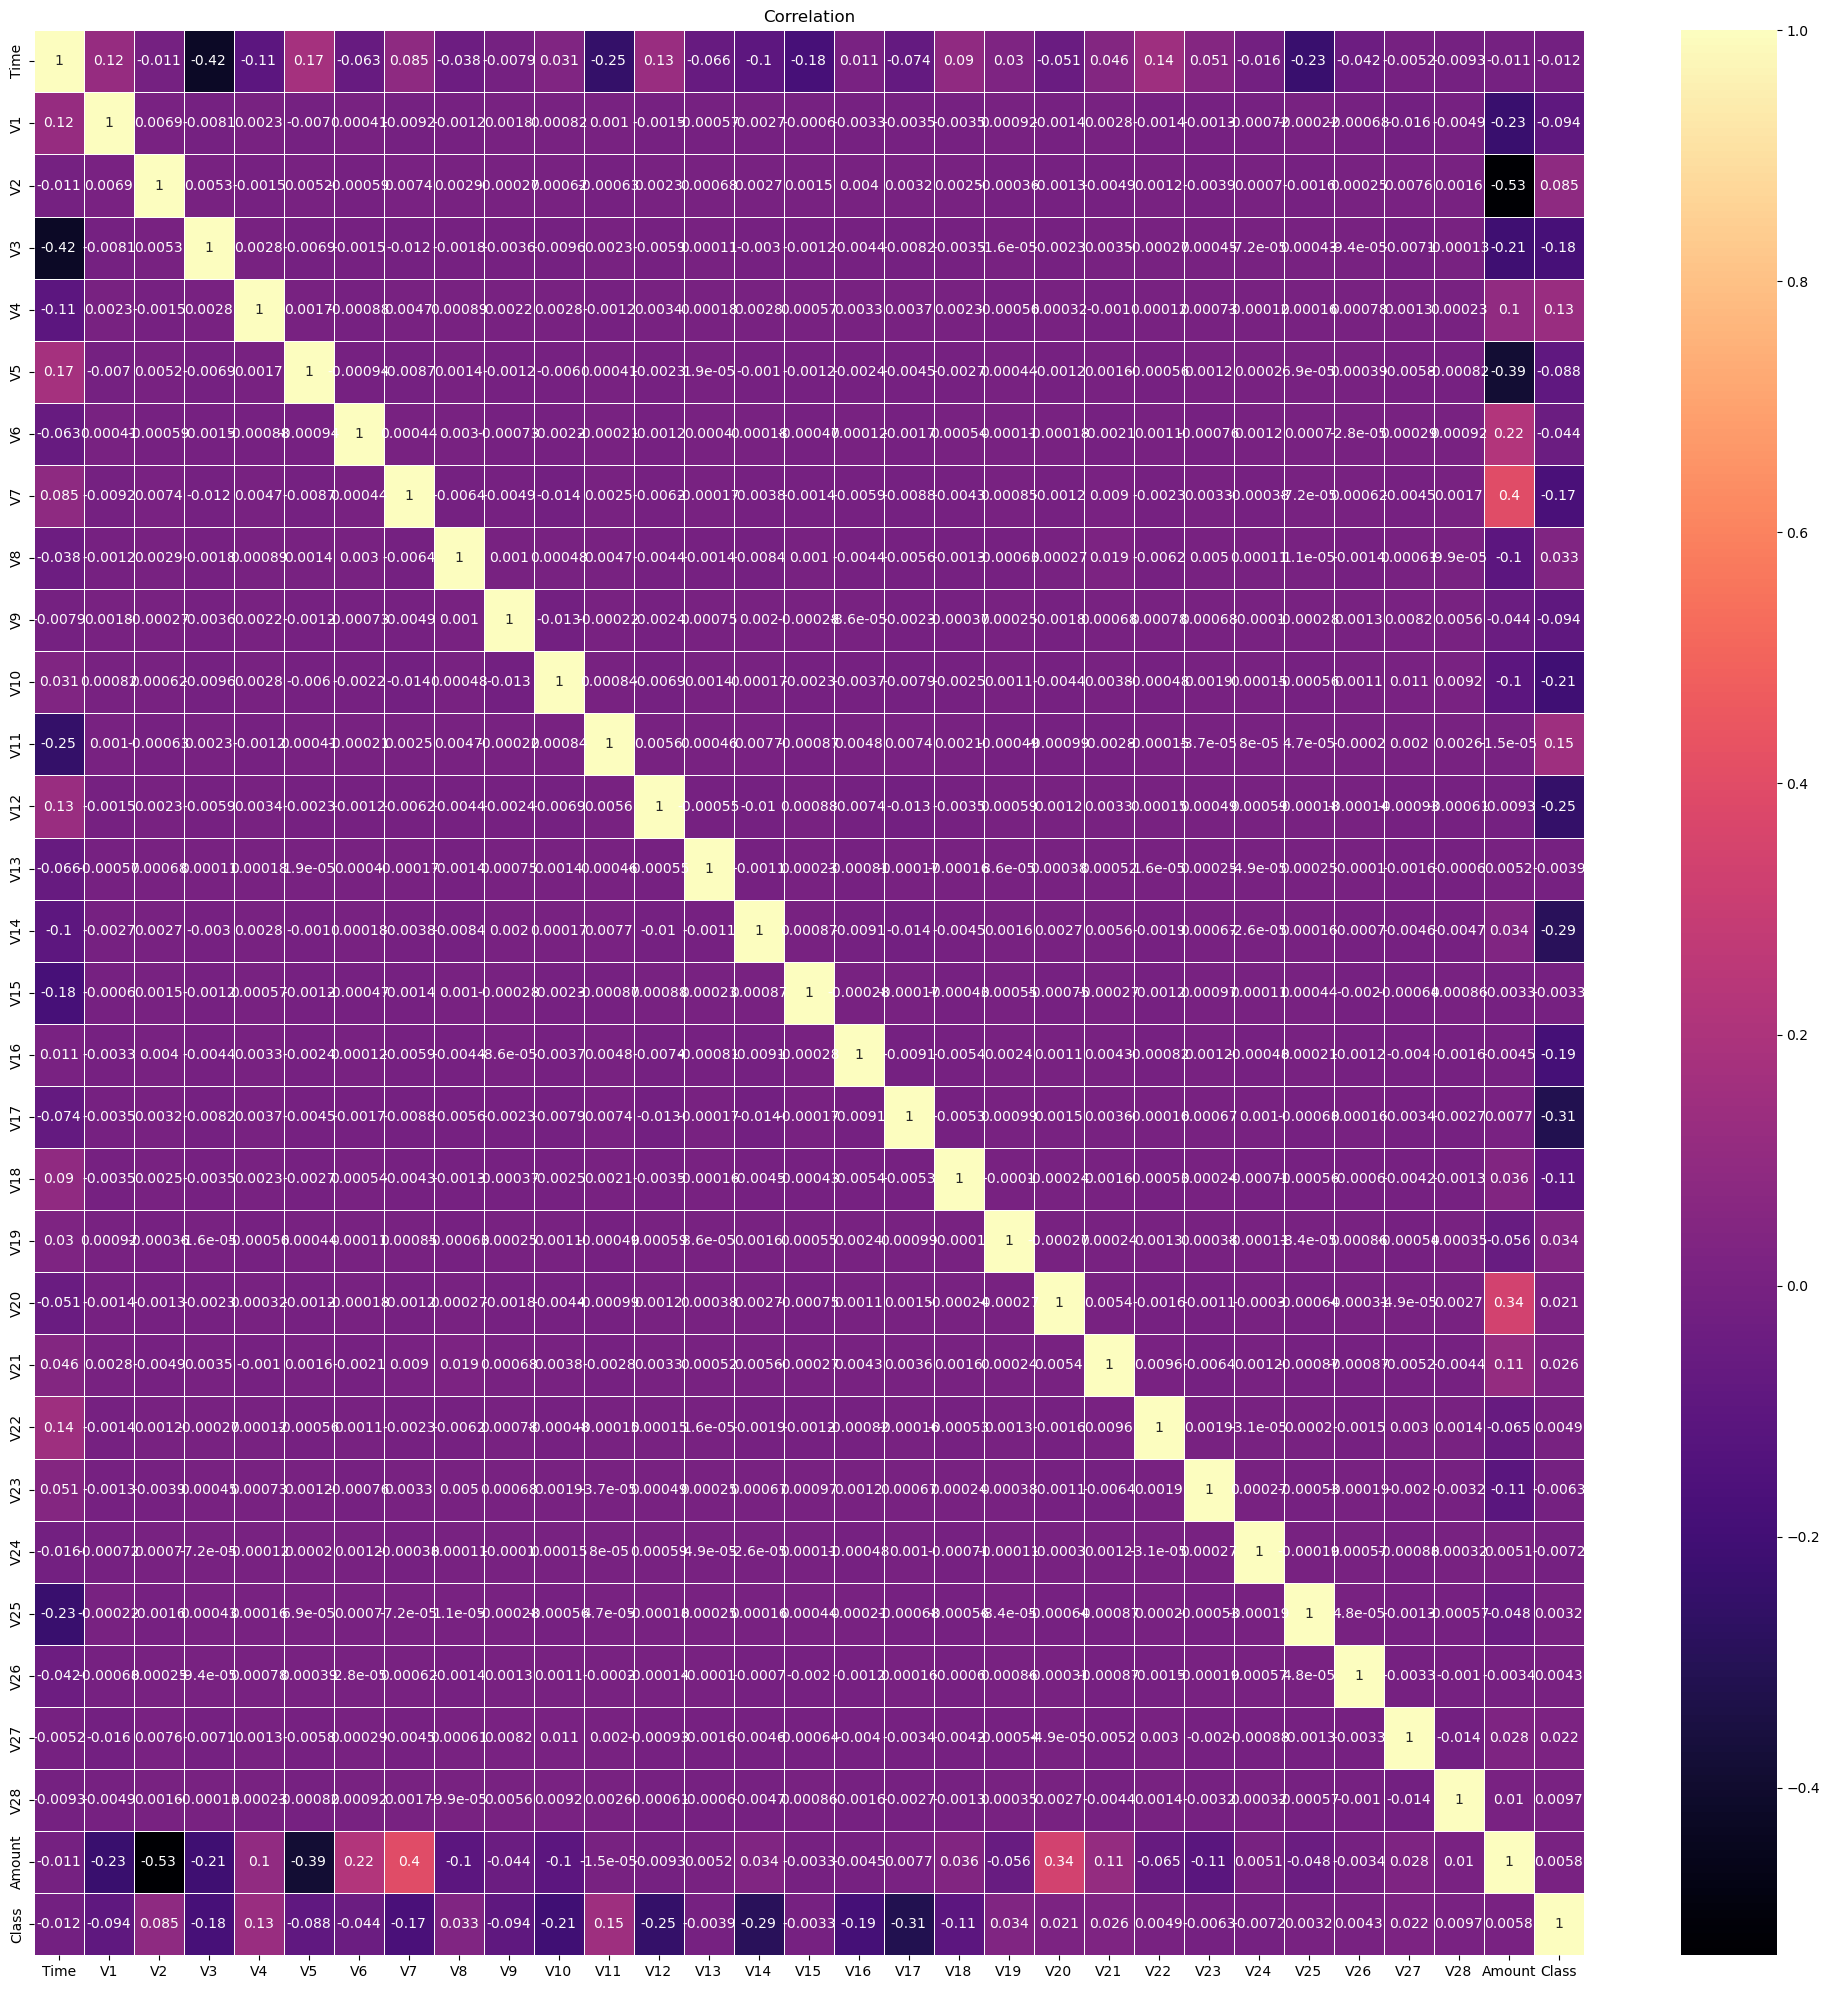

In [14]:
plt.figure(figsize=(25,25))
plt.title("Correlation")
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor='white',cmap='magma')
plt.show()

In [15]:
def scaling(data):
    scalers={}
    for col in data.columns[:-1]:
        scaler=MinMaxScaler()
        data[col]=scaler.fit_transform(np.array(data[col]).reshape(-1,1))
        scalers[col]=scaler
    return data,scalers    

In [16]:
data,scalers=scaling(data)

## Saving Scalers

In [17]:
pickle.dump(scalers,open('scalers.pkl','wb'))

## Loading Scalers

In [ ]:
scalers=pickle.load(open('scalers.pkl','rb'))

## Data Splitting

In [18]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)       

In [20]:
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

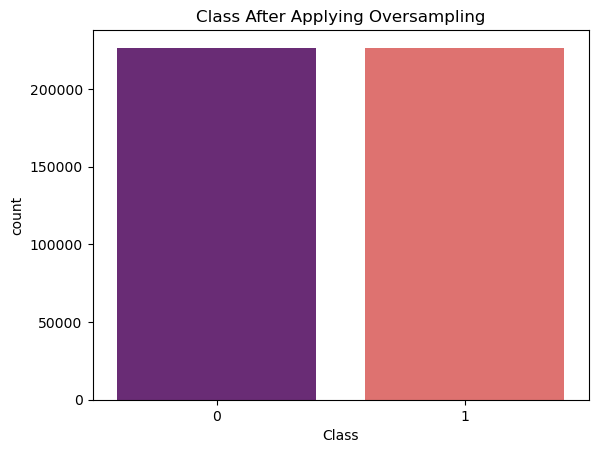

In [21]:
plt.title("Class After Applying Oversampling")
sns.countplot(x=y_train_resampled,palette='magma')
plt.show()

## Modeling

In [39]:
model=Sequential()
model.add(Input(shape=(X.shape[1],)))

model.add(Dense(16,activation='relu'))

model.add(BatchNormalization())

model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(BatchNormalization())

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(BatchNormalization())

model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 891 (3.48 KB)

 Trainable params: 835 (3.26 KB)

 Non-trainable params: 56 (224.00 B)

In [40]:
cp=ModelCheckpoint('creditcard_weights.keras',monitor='val_loss',save_best_only=True,verbose=1)
callbacks=[cp]

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history=model.fit(x_train_resampled,y_train_resampled,validation_split=0.2,batch_size=256,epochs=50,callbacks=callbacks)

Epoch 1/50
1411/1417 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9066 - loss: 0.3207
Epoch 1: val_loss improved from inf to 1.10144, saving model to creditcard_weights.keras
1417/1417 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9068 - loss: 0.3203 - val_accuracy: 0.8543 - val_loss: 1.1014
Epoch 2/50
1412/1417 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9762 - loss: 0.1223
Epoch 2: val_loss improved from 1.10144 to 0.71109, saving model to creditcard_weights.keras
1417/1417 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9762 - loss: 0.1222 - val_accuracy: 0.8613 - val_loss: 0.7111
Epoch 3/50
1413/1417 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9825 - loss: 0.0739
Epoch 3: val_loss did not improve from 0.71109
1417/1417 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9825 - loss: 0.0738 - val_accuracy: 0.8882 - val_loss: 0.7445
Epoch 4/50
1416/1417 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9855 - loss: 0.0525
Epoch 4: val_loss improved from 0.71109 to 0.39116, saving 

## Evaluation

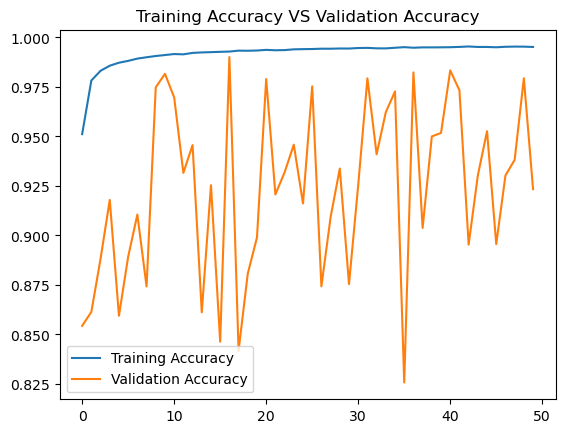

In [43]:
plt.title('Training Accuracy VS Validation Accuracy')
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

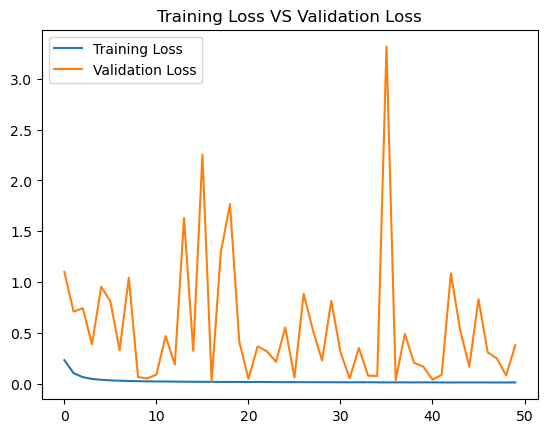

In [44]:
plt.title('Training Loss VS Validation Loss')
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [45]:
model.evaluate(x_test,y_test)

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0156


[0.016892313957214355, 0.9959115982055664]

In [46]:
y_pred=model.predict(x_test)

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


In [47]:
y_p=[]
for y in y_pred:
    if y>=0.5:
        y_p.append(1)
    else:
        y_p.append(0)    

In [48]:
y_p[:5]

[0, 0, 0, 0, 0]

In [50]:
report=classification_report(y_test,y_p)
print("Classification Report : \n"+report)

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.25      0.80      0.38        90

    accuracy                           1.00     56746
   macro avg       0.63      0.90      0.69     56746
weighted avg       1.00      1.00      1.00     56746



In [51]:
conf_mat=confusion_matrix(y_test,y_p)
conf_mat

array([[56442,   214],
       [   18,    72]], dtype=int64)

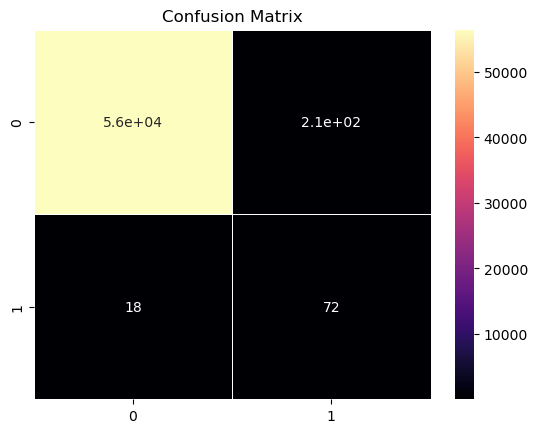

In [52]:
plt.title('Confusion Matrix')
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor='white',cmap='magma')
plt.show()

## Saving Model

In [53]:
model.save('creditcard_model.h5')

## Loading Model

In [ ]:
model=load_model('creditcard_model.h5')